In [16]:
%run "./1. Data Loading.ipynb"

X: (800, 360, 25)
Y: (800,)


In [17]:
from sklearn.decomposition import PCA

In [18]:
num_components = 360
top_components = 8
top_regions = 8

In [19]:
# Helepr function: 
def run_pca(input_data, num_components):
    pca = PCA(num_components)
    pca.fit(input_data)
    reduced_data = pca.transform(input_data)
    explained_variance_ratio = pca.explained_variance_ratio_
    components = pca.components_
    return (reduced_data, explained_variance_ratio, components)

def explain_data(data):
    reduced_data, explained_variance_ratio, components = run_pca(data, num_components = num_components)
    print(f"PCA Input Shape:\t\t{data.shape}")
    print(f"Explained Variance Shape:\t{explained_variance_ratio.shape}")
    print(f"Components Shape:\t\t{components.shape}")
    print(f"Reduced Data Shape:\t\t{reduced_data.shape}\n")

    print (f"{num_components} components account for {round(np.cumsum(explained_variance_ratio)[-1] * 100, 2)}% of the total variance.\n")
    # Each row in pca.components_ represents a principal component, 
    # and the values within each row indicate the weights of the original variables for that component.
    for component_index, variance in enumerate(explained_variance_ratio[:top_components]):
        print(f"Component {component_index + 1} explained {round(variance * 100, 2)}% of the variance.")
        
        component_loadings = components[component_index]
        absolute_loadings = np.abs(component_loadings)
        most_influential = sorted([(i, value) for i, value in enumerate(absolute_loadings)], key=lambda x: x[1], reverse=True)

        print(f"\tThe top {top_regions} weighted regions in this component are:")
        for loading_index, _ in most_influential[:top_regions]:
            print(f"\t\t[{regions[1][loading_index]}] {regions[0][loading_index]}\twith a weight of {round(component_loadings[loading_index], 4)}")
        print("\n")

    cumulative_variance = np.cumsum(explained_variance_ratio)
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Variance Explained')
    plt.title('Cumulative Variance Explained by Principal Components')
    plt.show()

##### Neutral PCA:

PCA Input Shape:		(400, 360)
Explained Variance Shape:	(360,)
Components Shape:		(360, 360)
Reduced Data Shape:		(400, 360)

360 components account for 100.0% of the total variance.

Component 1 explained 15.51% of the variance.
	The top 8 weighted regions in this component are:
		[Posterior-Mu] L_v23ab	with a weight of 0.154
		[Posterior-Mu] L_p32	with a weight of 0.1489
		[Posterior-Mu] L_10r	with a weight of 0.1453
		[Posterior-Mu] L_10d	with a weight of 0.1367
		[Posterior-Mu] L_31pv	with a weight of 0.1337
		[Posterior-Mu] R_10r	with a weight of 0.1316
		[Posterior-Mu] R_v23ab	with a weight of 0.131
		[Posterior-Mu] L_a24	with a weight of 0.122


Component 2 explained 5.13% of the variance.
	The top 8 weighted regions in this component are:
		[Posterior-Mu] R_10v	with a weight of 0.1788
		[Posterior-Mu] L_10r	with a weight of 0.1619
		[Posterior-Mu] L_10v	with a weight of 0.1611
		[Posterior-Mu] L_10pp	with a weight of 0.1417
		[Frontopariet] L_13l	with a weight of 0.1404
		[Front

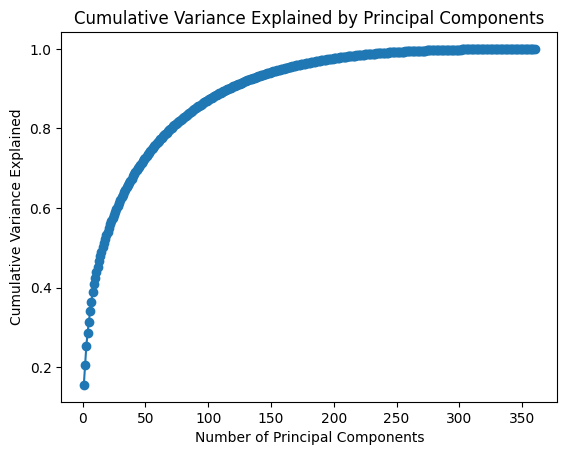

In [20]:
# Prepare data
neut_timeseries = X[Y == 0]
neut_timeseries_average = np.mean(neut_timeseries, axis=2)
explain_data(neut_timeseries_average)


##### Fearful PCA:

PCA Input Shape:		(400, 360)
Explained Variance Shape:	(360,)
Components Shape:		(360, 360)
Reduced Data Shape:		(400, 360)

360 components account for 100.0% of the total variance.

Component 1 explained 8.77% of the variance.
	The top 8 weighted regions in this component are:
		[Posterior-Mu] L_p32	with a weight of 0.1922
		[Posterior-Mu] L_10r	with a weight of 0.1751
		[Posterior-Mu] R_10r	with a weight of 0.1694
		[Posterior-Mu] L_v23ab	with a weight of 0.1676
		[Posterior-Mu] L_10d	with a weight of 0.1596
		[Posterior-Mu] L_31pv	with a weight of 0.1561
		[Posterior-Mu] R_p32	with a weight of 0.1474
		[Posterior-Mu] R_s32	with a weight of 0.1457


Component 2 explained 5.5% of the variance.
	The top 8 weighted regions in this component are:
		[Frontopariet] L_a10p	with a weight of 0.178
		[Posterior-Mu] R_v23ab	with a weight of -0.1591
		[Frontopariet] L_AVI	with a weight of 0.1506
		[Posterior-Mu] R_s32	with a weight of -0.1441
		[Posterior-Mu] L_10pp	with a weight of 0.1405
		[Po

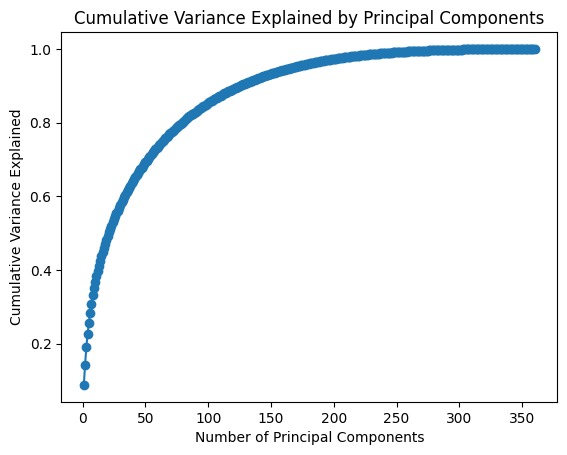

In [21]:
# Prepare data
fear_timeseries = X[Y == 1]
fear_timeseries_average = np.mean(fear_timeseries, axis=2)
explain_data(fear_timeseries_average)
